Deputado Histogramado
============

[expressao.xyz/deputado/](http://expressao.xyz/deputado/)

Como processar as sessões do parlamento Português

Índice
-----

1. [Reunír o dataset](Deputado-Histogramado-1.ipynb)
2. [Contando as palavras mais comuns](Deputado-Histogramado-2.ipynb)
3. [Fazendo histogramas](Deputado-Histogramado-3.ipynb)
4. [Representações geograficas](Deputado-Histogramado-4.ipynb)
5. [Simplificar o dataset e exportar para o expressa.xyz/deputado/](Deputado-Histogramado-5.ipynb)

O que se passou nas mais de 4000 sessões de discussão do parlamento Português que ocorreram desde 1976? 
Neste notebook vamos tentar visualizar o que se passou da maneira mais simples - contando palavras, e fazendo gráficos.

Para obter os textos de todas as sessões usaremos o [demo.cratica.org](demo.cratica.org), onde podemos aceder facilmente a todas as sessões do parlamento de 1976 a 2015. Depois com um pouco de python, pandas e matplotlib vamos analisar o que se passou.

Para executar estes notebook será necessário descarregar e abrir com o Jupiter Notebooks (a distribuição Anaconda faz com que instalar todas as ferramentas necessárias seja fácil - https://www.continuum.io/downloads)


## Parte 2 - Contando Palavras

Código para carregar os dados do notebook anterior: 


In [1]:
%matplotlib inline
import pylab
import matplotlib
import pandas
import numpy


dateparse = lambda x: pandas.datetime.strptime(x, '%Y-%m-%d')
sessoes = pandas.read_csv('sessoes_democratica_org.csv',index_col=0,parse_dates=['data'], date_parser=dateparse)

Bem, agora podemos começar a brincadeira. 

Pandas, quantas vezes aparece a palavra 'Aplausos' no texto?

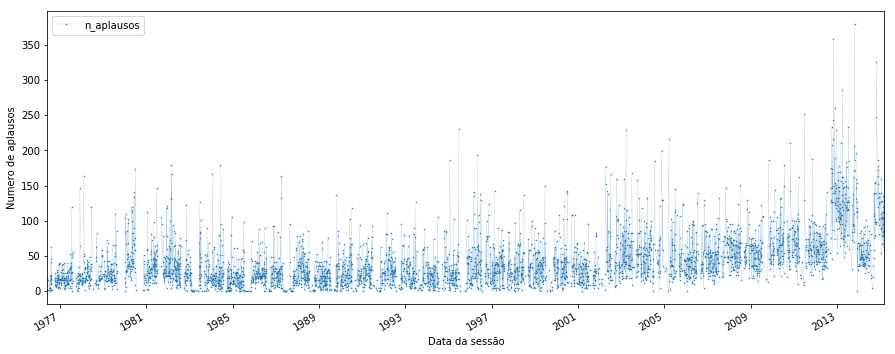

In [2]:
#define a funçao que conta aplausos
# procura 'aplauso' (nota: tambem conta 'aplausos')
def conta_aplausos(texto):
    return texto.count('aplauso') 

#aplica a funçao a cada sessão e cria nova coluna com os resultados
sessoes['n_aplausos'] = sessoes['sessao'].map(conta_aplausos)

ax = sessoes.plot(x='data',y='n_aplausos',figsize=(15,6),linewidth=0.1,marker='.',markersize=1)
ax.set_xlabel('Data da sessão')
ax.set_ylabel('Numero de aplausos')

Salta logo á vista que há sessões excepcionais com muito mais aplausos que outras (para cima de 200 menções de aplausos). Talvez sejam mais interessantes? ou controversas? 

Vamos investigar as sessões mais animadas. 

Pandas, quais são as sessões com mais de 250 aplausos?

In [3]:
#define funçao que verifica se o numero de aplausos é maior que 200
def tem_mais_que_250_aplausos(val):
    return val['n_aplausos']>250
    
#aplica a função a todas as linhas do dataframe
# assim cria-se um novo dataframe apenas com os elementos onde a função é 'true'
sessoes_250aplausos = sessoes[tem_mais_que_250_aplausos]
sessoes_250aplausos

,sessao,data,tamanho,n_aplausos
3522,"sexta-feira, 1 de julho de 2011 sexta-feira, ...",2011-06-30,286363,252
3671,"quarta-feira, 31 de outubro de 2012 quarta-f...",2012-10-30,391628,358
3676,"quinta-feira, 27 de novembro de 2012 quinta-...",2012-11-26,278758,260
3726,"quinta-feira, 4 de abril de 2013 quinta-feir...",2013-04-03,195272,286
3787,"sexta-feira, 1 de novembro de 2013 sexta-fei...",2013-10-31,433453,380
3898,"sexta-feira, 31 de outubro de 2014 sexta-fei...",2014-10-30,429959,326


Várias sessões. Analisemos as palavras mais frequentes em cada uma.

In [7]:

import re 
from collections import Counter

# aceita um texto, e retorna as 10 palavras mais comuns, com o correspondente número de ocorrencias
def conta_palavras(texto):
    palavras = re.split(';|,|\n| |\(|\)|\?|\!|:',texto) #separa as palavras
    palavras = [x.title() for x in palavras if len(x)>=5] #organiza e remove as palavras com menos de 5 caracteres
    return Counter(palavras).most_common(10)  # analisa as palavras e determina as 10 mais frequentes

# conta palavras em cada sessao com mais de 250 aplausos
l = sessoes_250aplausos['sessao'].map(conta_palavras)
datas = sessoes_250aplausos['data'][l.index] #selecciona apenas as datas, a sintaxe é contrieved

#agrupa os dados num dataframe, com uma coluna por data, e cada célula indicando ('n_contagens' x 'palavra')
dados = [[str(str(z)+' x '+y) for (y,z) in l[x]] for x in l.index] 
pandas.DataFrame(dados,index=datas).transpose()

data,2011-06-30 00:00:00,2012-10-30 00:00:00,2012-11-26 00:00:00,2013-04-03 00:00:00,2013-10-31 00:00:00,2014-10-30 00:00:00
0,321 x Governo,420 x Primeiro-Ministro,475 x Presidente,330 x Governo,409 x Governo,424 x Governo
1,287 x Primeiro-Ministro,378 x Estado,317 x Estado,286 x Aplausos,383 x Orçamento,357 x Primeiro-Ministro
2,254 x Presidente,358 x Aplausos,291 x Governo,160 x Deputado,380 x Aplausos,340 x Deputado
3,252 x Aplausos,325 x Governo,260 x Aplausos,155 x Partido,327 x Estado,326 x Aplausos
4,220 x Programa,315 x Deputado,218 x Proposta,150 x Primeiro-Ministro,317 x Primeiro-Ministro,315 x Orçamento
5,193 x Muito,301 x Presidente,199 x Deputados,149 x António,316 x Deputado,299 x Presidente
6,177 x Cds-Pp,267 x Orçamento,198 x Secretário,147 x Presidente,272 x Presidente,269 x Estado
7,149 x Estado,205 x Ministro,190 x Deputado,124 x Cds-Pp.,206 x Cds-Pp,193 x Muito
8,141 x Ministro,174 x Muito,174 x Cds-Pp,119 x Seguro,194 x Muito,185 x Também
9,130 x Vozes,172 x Soares,140 x Artigo,116 x Vozes,176 x Porque,177 x Porque


Antes de tirarmos conclusões, resolvemos 2 problemas com os dados. Primeiro, há palavras que não adicionam muito á conversa ('governo', 'muito','ministro','todos', etc). Segundo, há palavras que podem ter um significado diferente consoante são usadas sozinhas ou numa expressão (e.g. 'Milhões de Euros' vs 'Milhões de Pensionistas'). Vamos reprocessar os dados com isto em conta.

In [9]:

# conta as 10 palavras mais comuns, tendo em conta expressoes comuns com significado importante, e removendo as palavras mais comuns que não nos ajudam a perceber o que se esta a passar
def conta_palavras_xpto(texto):
    # substitui expressoes
    expressoes = [['milhões de euros','milhões-de-euros'],['programa do governo','programa-do-Governo'],['orçamento do estado','orçamento-de-Estado'],['orçamento de Estado','orçamento-de-Estado'],['união europeia','união-europeia'],['bernardino soares','bernardino-soares'],['antónio josé seguro','antónio-seguro'],['honório novo','honório-novo'],['moção de censura','moção-de-censura'],['partido socialista','partido-socialista'],['partido social democrata','partido-social-democrata'],['bloco de esquerda','bloco-de-esquerda'],['partido comunista','partido-comunista'],['jerónimo de sousa','jerónimo-de-sousa'],['luís montenegro','luís-montenegro'],['medidas','medida']]
    for chave in expressoes:
        texto = texto.replace(chave[0],chave[1])
    
    #remove palavras nao interessantes
    lista = ['portugal','portugueses','estado','governo','deputado','deputada','primeiro-ministro','presidente','ministro','ministra','sobre','fazer','vozes','também','aplausos','quando','porque','muito','cds-pp','palavra','ainda','dizer','todos','deste','nesta','nossa','temos','nosso','nossa','estão','maria','sempre','sr.as','neste','silva','favor','agora']
    for palavra in lista:
        texto = texto.replace(palavra,'')
    
    palavras = re.split(';|,|\n| |\(|\)|\?|\!|:',texto) #separa as palavras
    palavras = [x.title() for x in palavras if len(x)>=5] #organiza e remove as palavras com menos de 5 caracteres
    return Counter(palavras).most_common(10)  # analisa as palavras e determina as 10 mais frequentes

# conta palavras em cada sessao com mais de 250 aplausos
l = sessoes_250aplausos['sessao'].map(conta_palavras_xpto)
datas = sessoes_250aplausos['data'][l.index]

#agrupa os dados num dataframe, com uma coluna por data, e cada célula indicando ('n_contagens' x 'palavra')
dados = [[str(str(z)+' x '+y) for (y,z) in l[x]] for x in l.index]
pandas.DataFrame(dados,index=datas).transpose()



data,2011-06-30 00:00:00,2012-10-30 00:00:00,2012-11-26 00:00:00,2013-04-03 00:00:00,2013-10-31 00:00:00,2014-10-30 00:00:00
0,146 x Programa,146 x Orçamento,218 x Proposta,115 x António-Seguro,245 x Orçamento,192 x Orçamento
1,128 x Medida,144 x Bernardino-Soares,198 x Secretário,96 x Partido-Socialista,159 x Economia,120 x Economia
2,94 x Bernardino-Soares,140 x Protestos,140 x Artigo,75 x Política,127 x Orçamento-De-Estado,113 x Orçamento-De-Estado
3,85 x Finanças,130 x Finanças,129 x Social,72 x Protestos,121 x Empresas,111 x Fiscal
4,66 x Programa-Do-Governo,124 x Dívida,99 x Votos,61 x Moção-De-Censura,118 x Dívida,109 x Empresas
5,65 x Economia,113 x Orçamento-De-Estado,85 x Protestos,48 x Maioria,116 x Milhões-De-Euros,107 x Aumento
6,62 x Social,109 x Milhões-De-Euros,78 x Fiscais,45 x Partido,114 x Défice,105 x Crescimento
7,52 x Empresas,109 x António-Seguro,73 x Propostas,41 x Alternativa,111 x Medida,100 x Dívida
8,49 x Tempo,99 x Despesa,72 x Pedro,41 x Bernardino-Soares,110 x Partido-Socialista,96 x Partido-Socialista
9,47 x Votos,96 x Social,72 x Bernardino-Soares,40 x Finanças,106 x Oliveira,94 x Protestos


Vemos que as sessões mais aplaudidas são ou sobre o orçamento de estado ou discussões aparentemente partidárias.

Curiosamente as sessões sobre o orçamento de estado parecem ser todas no fim de Outubro. Vamos ver se isso tambem é verdade nos outros anos. Contemos o número de ocorrencias da expressão e façamos o gráfico.

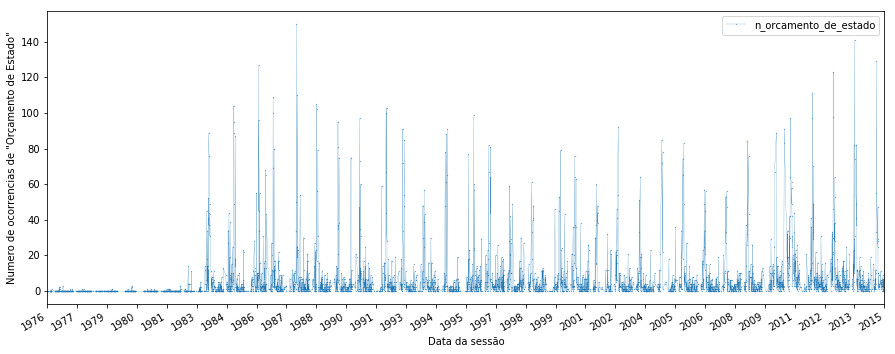

In [10]:
def conta_orcamento_de_estado(texto):
    return (texto.count('orçamento de estado') + texto.count('orçamento do estado'))

#aplica a funçao a cada sessão e cria nova coluna com os resultados
sessoes['n_orcamento_de_estado'] = sessoes['sessao'].map(conta_orcamento_de_estado)

ax = sessoes.plot(x='data',y='n_orcamento_de_estado',figsize=(15,6),linewidth=0.2,marker='.',markersize=0.5)
start, end = ax.get_xlim() #poe uma tick por ano
import numpy #para criar um eixo do x uniformemente espaçado
ax.xaxis.set_ticks((numpy.linspace(start, end, 29)))
ax.set_xlabel('Data da sessão')
ax.set_ylabel('Numero de ocorrencias de "Orçamento de Estado"')


Interessante - antes de 1984 não se usava a expressão orçamento de estado ou orçamento do estado. 
Tambem, parece ser periódico. Vamos histogramar isto para ver o número de ocorrencias em cada semana do ano:


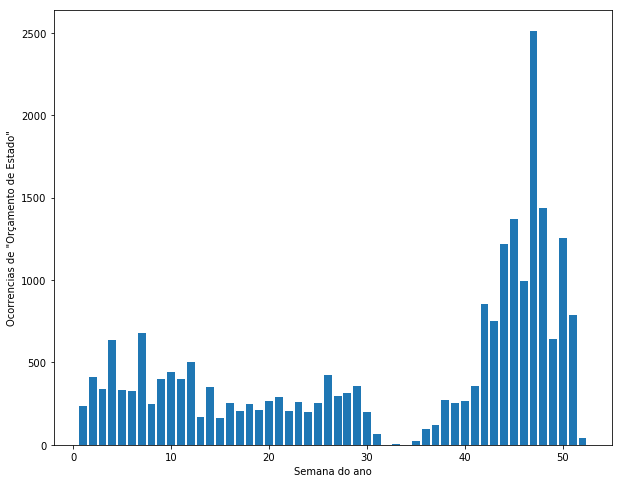

In [24]:
# retorna um vector com um item por sessao, e valor verdadeira se o número da semana é =i, falso se nao é
def selecciona_semana(data,i):
    return data.map(lambda d: d.weekofyear == i)

import numpy
ocorrencias_por_semana = numpy.zeros(53)
for i in range(1,53):
    # para cada semana do ano, calcula um vector com verdadeiro para as sessoes que ocorreram nesta semana e falso para as que nao ocorreram. soma tudo (verdadeiro = 1, falso = 0)
    # com esse vector, filtra apenas os items da coluna 'n_orcamento_de_estado' onde o vector é verdadeiro/sessao foi na semana que estamos a contar
    # soma as contagens das sessoes seleccionadas/filtradas
    ocorrencias_por_semana[i] = numpy.sum(sessoes['n_orcamento_de_estado'][selecciona_semana(sessoes['data'],i)])
    
f = pylab.figure(figsize=(10,8))    
ax = pylab.bar(range(1,53),ocorrencias_por_semana[1:53])
pylab.xlabel('Semana do ano')
pylab.ylabel('Ocorrencias de "Orçamento de Estado"')



Parece que se fala em orçamento de estado +- sempre com a mesma frequência de Jan a Junho, depois há férias (Julho-Agosto), e na 3ª semana de Outubro a coisa começa a aquecer - o termo orçamento de estado começa-se a usar 2x ou 3x mais do que o normal. 

Antes de mais, vamos tentar perceber porque não se usa a expressão orçamento de estado antes de 1984. Vamos analisar as palavras:

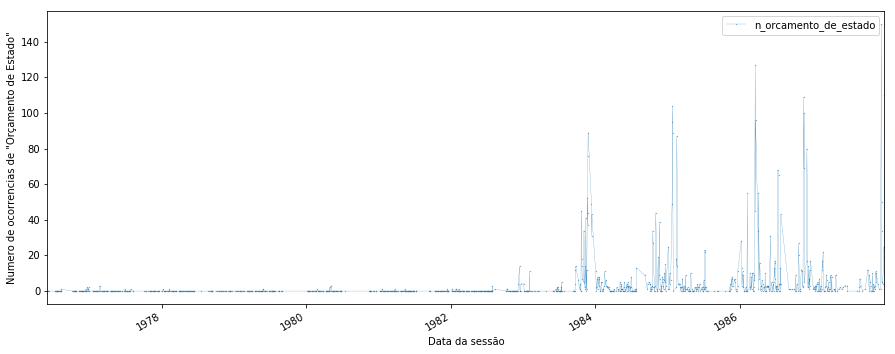

In [11]:
def selecciona_antes_ano(data,ano):
    return data.map(lambda d: d.year < ano)

sessoes_antes1984 = sessoes[selecciona_antes_ano(sessoes['data'],1984)]
sessoes_antes1988 = sessoes[selecciona_antes_ano(sessoes['data'],1988)]
sessoes_antes1984


ax = sessoes_antes1988.plot(x='data',y='n_orcamento_de_estado',figsize=(15,6),linewidth=0.2,marker='.',markersize=0.5)
ax.set_xlabel('Data da sessão')
ax.set_ylabel('Numero de ocorrencias de "Orçamento de Estado"')


Foi claramente em 1984 que a moda começou. Vamos ver se pelo menos usavam 'orçamento' com a mesma frequencia que em 1985.

/Users/fsilva/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/fsilva/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


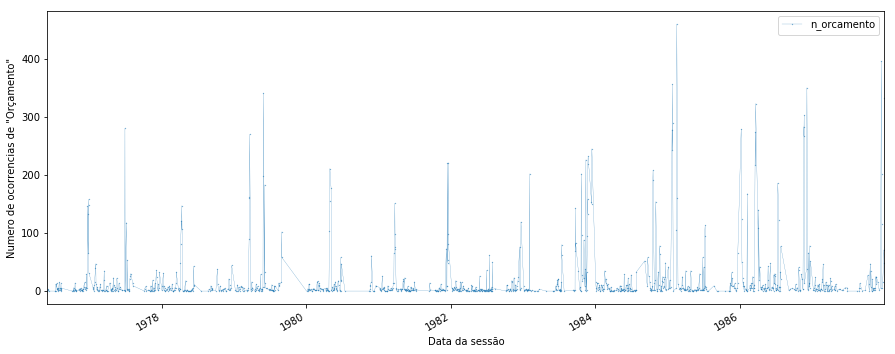

In [12]:
def conta_orcamento(texto):
    return texto.count('orçamento')

sessoes_antes1988.loc[:,'n_orcamento'] = sessoes_antes1988['sessao'].apply(conta_orcamento)

ax = sessoes_antes1988.plot(x='data',y='n_orcamento',figsize=(15,6),linewidth=0.2,marker='.',markersize=0.5)
ax.set_xlabel('Data da sessão')
ax.set_ylabel('Numero de ocorrencias de "Orçamento"')

Orçamento sempre se usou, pelos vistos.




Por curiosidade, vamos analisar as palavras mais frequentes de todas as sessões de vários anos 1980, 1990, 2000 e 2010 e ver se há alguma tendência.


In [27]:
# Cria uma lista com todas as palavras no texto com mais de 4 caracteres, na sequência que aparecem neste
def agrupa_palavras(texto):
    palavras = re.split(';|,|\n| |\(|\)|\?|\!|:',texto)   # separa as palavras
    palavras = [x.title() for x in palavras if len(x)>=5] # organiza e remove as palavras com menos de 5 caracteres
    return palavras

# Cria uma lista das 40 palavras mais comuns neste conjunto de sessões, e conta o número de ocorrencias
def conta_palavras(sessoes):
    lista = sessoes['sessao'].map(agrupa_palavras)  # cria uma lista de 'lista de palavras', um elemento por sessao
    palavras = []
    for l in lista:
        palavras.extend(l)                          # junta as várias 'listas de palavras' todas na mesma lista (i.e. junta as várias sessoes, antes de contar)
    return Counter(palavras).most_common(40)        # conta as palavras mais frequentes

def selecciona_ano(data,ano):
    return data.map(lambda d: d.year == ano)

#filtra sessoes que ocorreram num dado ano
sessoes_1980 = sessoes[selecciona_ano(sessoes['data'],1980)]
sessoes_1990 = sessoes[selecciona_ano(sessoes['data'],1990)]
sessoes_2000 = sessoes[selecciona_ano(sessoes['data'],2000)]
sessoes_2010 = sessoes[selecciona_ano(sessoes['data'],2010)]

# conta palavras mais frequentes nos vários grupos de sessoes
c1980 = conta_palavras(sessoes_1980)
c1990 = conta_palavras(sessoes_1990)
c2000 = conta_palavras(sessoes_2000)
c2010 = conta_palavras(sessoes_2010)

#organiza os dados numa tabela
dados =     [[str(str(z)+' x '+y) for (y,z) in c1980]]
dados.append([str(str(z)+' x '+y) for (y,z) in c1990])
dados.append([str(str(z)+' x '+y) for (y,z) in c2000])
dados.append([str(str(z)+' x '+y) for (y,z) in c2010])
pandas.DataFrame(dados,index=['1980','1990','2000','2010']).transpose()



,1980,1990,2000,2010
0,19983 x Presidente,16135 x Deputado,20591 x Presidente,14397 x Presidente
1,17327 x Governo,15769 x Presidente,15621 x Deputado,12863 x Governo
2,16734 x Deputado,12514 x Governo,12906 x Governo,10142 x Deputado
3,12299 x Deputados,11040 x Deputados,11148 x Muito,8452 x Deputados
4,8404 x Muito,7991 x Muito,11010 x Deputados,8334 x Muito
5,7987 x Orador,6679 x Sobre,9890 x Orador,7461 x Também
6,7355 x Palavra,6679 x Estado,8255 x Estado,7250 x Estado
7,6263 x Partido,6436 x Palavra,7804 x Cds-Pp,7185 x Cds-Pp
8,6256 x Assembleia,6417 x Também,7624 x Também,6842 x Aplausos
9,5954 x Porque,6156 x António,7457 x Porque,6515 x Porque


Sao praticamente as mesmas palavras. 

Calculemos as mais frequentes de todos juntos e retiremo-las desta contagem:


In [28]:
# Cria uma lista das 100 palavras mais comuns neste conjunto de sessões, e conta o número de ocorrencias
def conta_palavras100(sessoes):
    lista = sessoes['sessao'].map(agrupa_palavras)  # cria uma lista de 'lista de palavras', um elemento por sessao
    palavras = []
    for l in lista:
        palavras.extend(l)                          # junta as 'listas de palavras' todas na mesma lista
    return Counter(palavras).most_common(100)        # conta as palavras mais frequentes

todas_sessoes = pandas.concat([sessoes_1980, sessoes_1990, sessoes_2000, sessoes_2010])

contagem = conta_palavras100(todas_sessoes)
dados = [[str(str(z)+' x '+y) for (y,z) in contagem]]
palavras_a_retirar = sorted([y for (y,z) in contagem],key=len)
pandas.DataFrame(dados).transpose()

,0
0,70740 x Presidente
1,58632 x Deputado
2,55610 x Governo
3,42801 x Deputados
4,35877 x Muito
5,27257 x Também
6,26052 x Palavra
7,26001 x Estado
8,25847 x Porque
9,24430 x Sobre


In [67]:
# Cria uma lista com todas as palavras no texto com mais de 4 caracteres, na sequência que aparecem neste
# mas não incluí as 100 palavras mais comuns nesta lista
def agrupa_palavras2(texto):
    texto = texto.lower() #processa tudo em minusculas
    
    #remove palavras nao interessantes
    for palavra in palavras_a_retirar:
        texto = texto.replace(palavra.lower(),'')
    
    palavras = re.split(';|,|\n| |\(|\)|\?|\!|:',texto)   # separa as palavras
    palavras = [x.title() for x in palavras if len(x)>=5] # organiza e remove as palavras com menos de 5 caracteres
    return palavras

def conta_palavras2(sessoes):
    lista = sessoes['sessao'].map(agrupa_palavras2)  # cria uma lista de 'lista de palavras', um elemento por sessao
    palavras = []
    for l in lista:
        palavras.extend(l)                          # junta as 'listas de palavras' todas na mesma lista
    return Counter(palavras).most_common(40)        # conta as palavras mais frequentes


c1980 = conta_palavras2(sessoes_1980)
c1990 = conta_palavras2(sessoes_1990)
c2000 = conta_palavras2(sessoes_2000)
c2010 = conta_palavras2(sessoes_2010)

dados =     [[str(str(z)+' x '+y) for (y,z) in c1980]]
dados.append([str(str(z)+' x '+y) for (y,z) in c1990])
dados.append([str(str(z)+' x '+y) for (y,z) in c2000])
dados.append([str(str(z)+' x '+y) for (y,z) in c2010])
pandas.DataFrame(dados,index=['1980','1990','2000','2010']).transpose()

,1980,1990,2000,2010
0,3598 x Maioria,2357 x Defesa,3112 x Número,3990 x Primeiro-
1,2582 x Poder,2356 x Marques,2788 x Paulo,3511 x Sr.As
2,2433 x Moreira,2043 x Questões,2669 x Segurança,2963 x Miguel
3,2370 x Vital,2008 x Gostaria,2417 x Primeiro-,2570 x Paulo
4,2318 x Constituição,2003 x Processo,2333 x Amaral,2492 x Milhões
5,2294 x Sousa,1985 x Conselho,2321 x Série,2482 x Empresas
6,2170 x Ordem,1915 x Lugar,2258 x Primeiro,2358 x Verdes
7,2153 x Oposição,1894 x Disse,2250 x Portas,2196 x Bernardino
8,2126 x Mdp/Cde,1774 x Administração,2149 x Processo,2154 x Pessoas
9,2030 x Português,1771 x Alguns,2103 x Francisco,2112 x Esquerda


Quando descontamos as 100 palavras mais comuns salientam-se mais as diferenças entre os textos. Mesmo assim é difícil tirar conclusões profundas, mas há algumas mais básicas:
- Paulo Portas estava a todo o gás no ano 2000, com Paulo e Portas a ocorrerem dois milhares de vezes
- os Verdes aparecem apenas nas colunas dos anos 2000 e 2010, apesar de tambem terem 2 deputados no ano 1990. Em 1980 ainda não tinha sido fundado o partido.
- 'Empresas' não aparece nem em 1990 nem 2000. (e não é uma das 100 palavras mais usadas no parlamento)
- 'Bloco' só aparece em 2010. Foi fundado em 1999, o que pode explicar isto. No entanto já tinha 4 deputados em 1999-2002.
- 'Crise' aparece apenas em 2010.
- 'Decreto-Lei' apenas aparece em 1980. Será que se falava mais de decretos lei nessa altura?




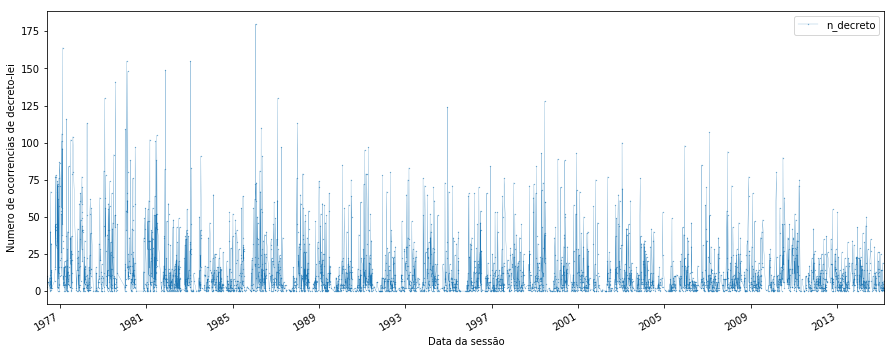

In [14]:
def conta_decretolei(texto):
    return (texto.count('decreto-lei')+texto.count('decretos-lei'))

sessoes['n_decreto'] = sessoes['sessao'].map(conta_decretolei)

ax = sessoes.plot(x='data',y='n_decreto',figsize=(15,6),linewidth=0.2,marker='.',markersize=0.5)
ax.set_xlabel('Data da sessão')
ax.set_ylabel('Numero de ocorrencias de decreto-lei')

Há picos maiores na decada de 80, mas o que interessa neste gráfico é a área,o que é difícil de quantificar num gráfico com tantos pontos. Vamos agrupar por ano:

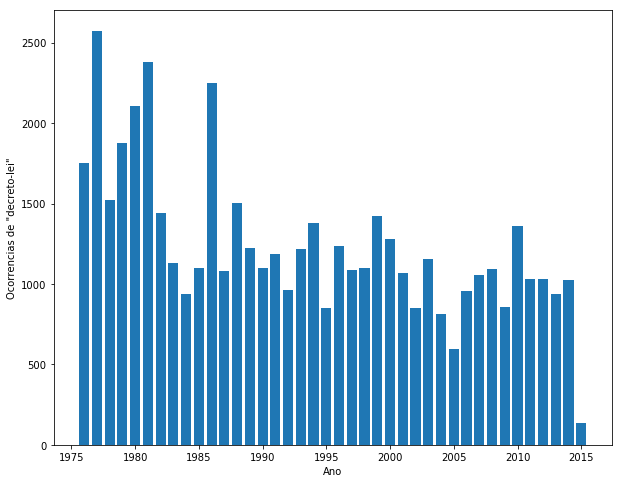

In [15]:
def selecciona_ano(data,i):
    return data.map(lambda d: d.year == i)

import numpy
ocorrencias_por_ano = numpy.zeros(2016-1976)
for i in range(0,2016-1976):
    # para cada ano, soma o número de ocorrencias de decreto
    # (filtrando as sessoes que ocorrem num dado ano, selecionando-as da coluna 'n_decreto' e somando todos os valores seleccionados)
    ocorrencias_por_ano[i] = numpy.sum(sessoes['n_decreto'][selecciona_ano(sessoes['data'],i+1976)])
    
f = pylab.figure(figsize=(10,8))    
ax = pylab.bar(range(1976,2016),ocorrencias_por_ano)
pylab.xlabel('Ano')
pylab.ylabel('Ocorrencias de "decreto-lei"')



É verdade. Falava-se mais de decreto-lei á volta de 1980, e em 1986.